## Análisis de Correlación Producción de Azúcar Total y Precios de Azúcar en México

Se presenta un análisis de correlación Producción -  Precio para México. Se utiliza un dataset del **Economic Research Service** del USDA (U.S. Department of Agriculture) que contiene información de Producción, Exportaciones, Importaciones, Consumo Interno, Stocks, Precios y Tasas de Cambio para períodos fiscales relacionados a azúcar (OCT año anterior a SEPT año actual).

(https://www.ers.usda.gov/data-products/sugar-and-sweeteners-yearbook-tables/)

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
# .csv Mexican Production & Prices
mx_df = pd.read_csv("SUGARMX.csv")
mx_df

,Fiscal year (Oct/Sept),Year,Production,Beginning stocks,Imports,Supply,Disappearance,Exports,Total use,Ending stocks,Stocks-to-human consumption,Stocks-to-use,HFCS consumption (dry weight),Previous Year Precipitation,Previous Year Temperature,Price,Exchange Rate
0,1995/96,1996,4642.00000,1587.000000,234.000000,6463.000000,4414.000000,646.000000,5060.000000,1403.000000,32.304858,27.727273,123.374946,766.80,21.173363,19.209814,7.486683
1,1996/97,1997,4818.00000,1403.000000,191.000000,6412.000000,4391.000000,966.000000,5357.000000,1055.000000,24.529179,19.693859,425.802000,664.40,20.828869,20.239937,7.858392
2,1997/98,1998,5486.00000,1055.000000,31.000000,6572.000000,4505.000000,1076.000000,5581.000000,991.000000,22.568891,17.756674,433.881320,692.10,20.722723,18.721164,8.671900
3,1998/99,1999,4982.00000,991.000000,41.000000,6014.000000,4549.000000,524.000000,5073.000000,941.000000,21.279964,18.549182,508.270000,741.00,21.239854,19.722633,9.695850
4,1999/00,2000,4979.00000,941.000000,37.000000,5957.000000,4576.000000,318.000000,4894.000000,1063.000000,23.914511,21.720474,614.800000,754.10,20.749099,21.324582,9.451167
5,2000/01,2001,5220.00000,1063.000000,43.000000,6326.000000,4623.000000,155.000000,4778.000000,1548.000000,34.545860,32.398493,636.000000,765.20,20.816391,21.743358,9.406742
6,2001/02,2002,5169.00000,1548.000000,52.000000,6769.000000,5184.000000,413.000000,5597.000000,1172.000000,23.421263,20.939789,278.250000,766.10,20.743932,23.468193,9.432075
7,2002/03,2003,5229.00000,1172.000000,63.000000,6464.000000,5232.000000,38.000000,5270.000000,1194.000000,23.425544,22.656546,137.800000,738.90,20.936534,23.576392,10.541250
8,2003/04,2004,5330.00000,1194.000000,327.000000,6851.000000,5600.000000,14.000000,5614.000000,1237.000000,22.992565,22.034200,143.100000,796.10,20.955060,24.820280,11.257033
9,2004/05,2005,6149.00000,1237.000000,268.000000,7654.000000,5561.000000,127.510000,5688.510000,1965.490000,37.232241,34.551930,376.300000,872.20,20.867124,25.499128,11.048642


### Production & Price of Mexican Sugar Time Series

<Axes: title={'center': 'Production Raw Metric Tons Mexico'}>

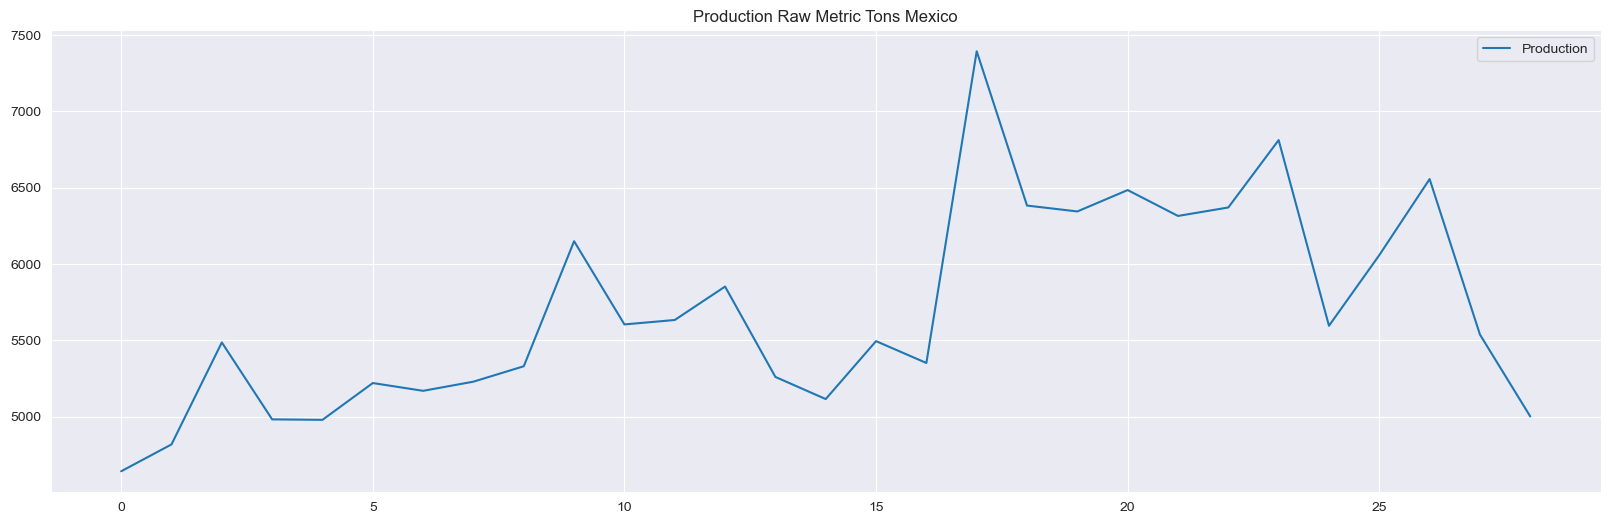

In [3]:
sns.set_style('darkgrid')
mx_df.drop(['Fiscal year (Oct/Sept)'],axis=1,inplace=True)
mx_df[['Production']].plot(figsize=(20,6),grid=True,title='Production Raw Metric Tons Mexico')

<Axes: title={'center': 'Nominal Price (US cents/ pound) Mexico'}>

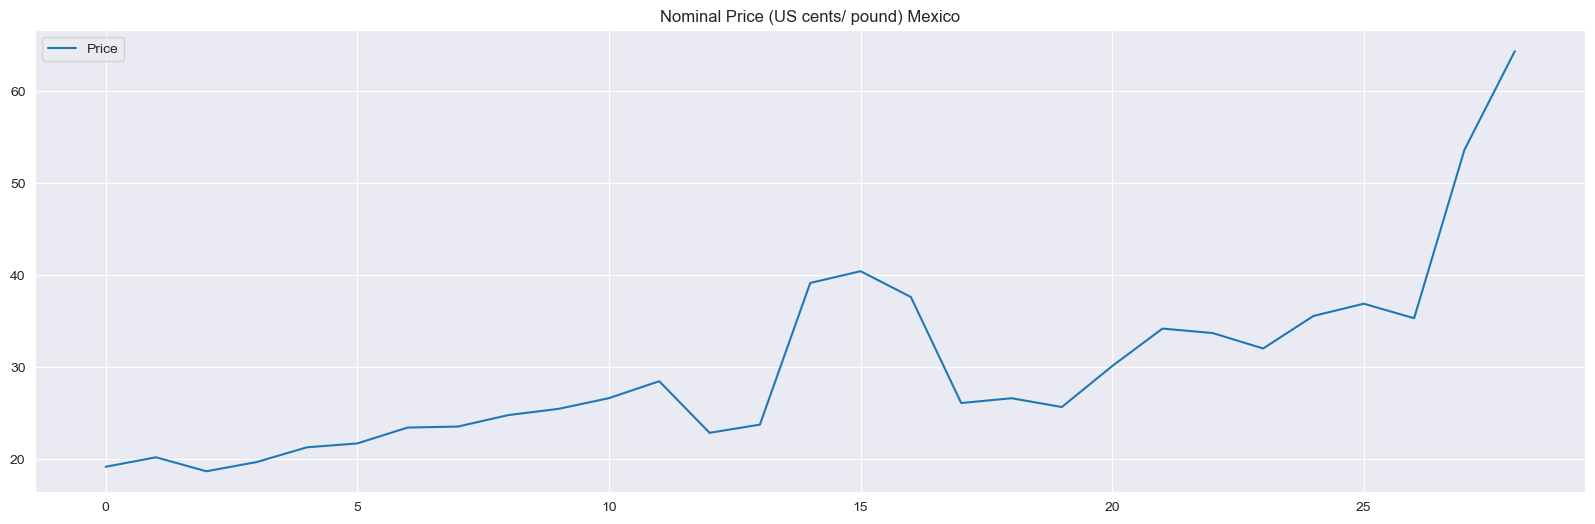

In [4]:
mx_df[['Price']].plot(figsize=(20,6),grid=True,title='Nominal Price (US cents/ pound) Mexico')

### Mexican Production Correlogram

<Axes: title={'center': 'Mexico Correlogram'}>

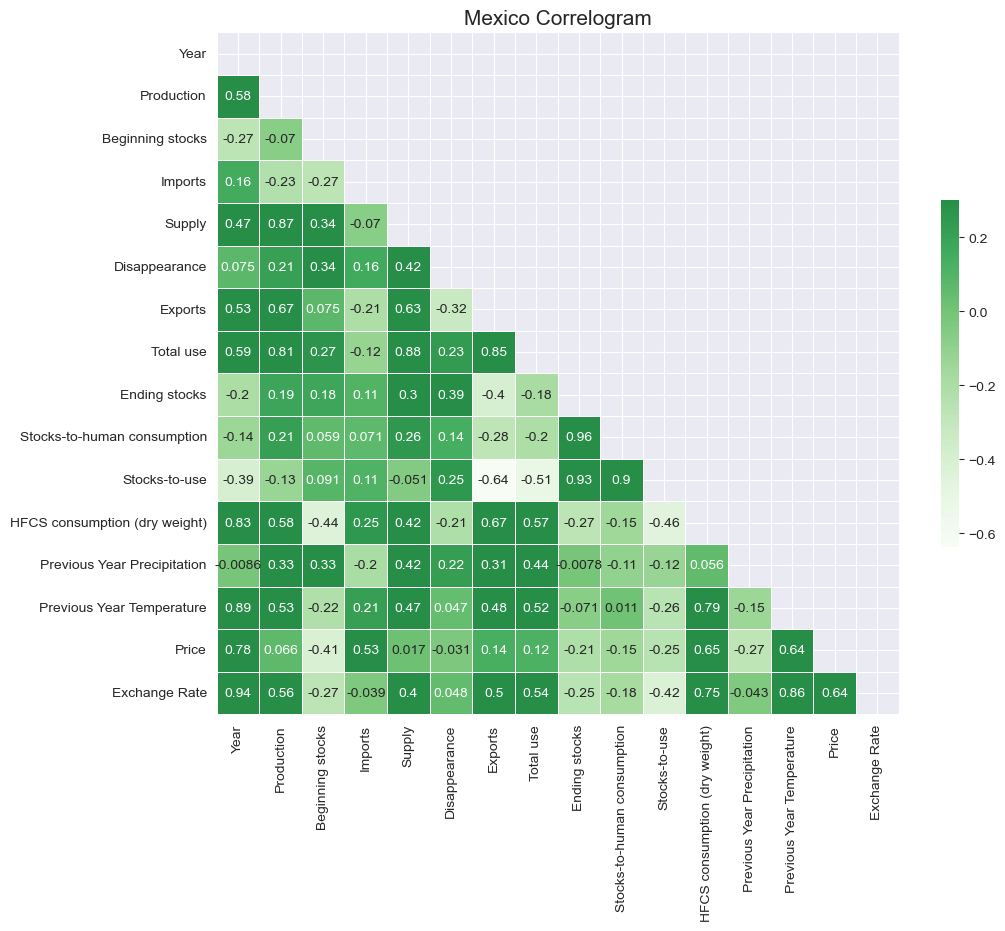

In [5]:
# Compute the correlation matrix
corr = mx_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
plt.title("Mexico Correlogram",size=15)
sns.heatmap(corr, mask=mask, cmap="Greens", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

La correlación simple muestra un valor bajo de **0.066** entre la *Producción* y el *Precio*. Conocemos de la teoría que esto no es preciso. Al analizar los datos de Precio, observamos que hay una tendencia a incrementar a lo largo del tiempo. Este es un efecto debido posiblemente a **inflación**.

La tendencia a crecer en el tiempo hace imposible ver la correlación entre Producción y Precio, por lo que es necesario aislar este efecto.

Se propone una metodología de **"de-trending"** para poder analizar los residuales y observar el efecto diferencial de la producción sobre los diferenciales de precio.

### Price ~ Year Trend

Calculamos un modelo de regresión OLS para estimar la tendencia de los precios a crecer con el tiempo.

In [6]:
# Multivariate OLS
OLS_model = smf.ols("Price ~ Year",data=mx_df).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     41.29
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           6.95e-07
Time:                        12:46:34   Log-Likelihood:                -94.946
No. Observations:                  29   AIC:                             193.9
Df Residuals:                      27   BIC:                             196.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1868.8795    295.533     -6.324      0.000   -2475.263   -1262.496
Year           0.9447      0.147      6.426      0.000       0.643       1.246
==============================================================================
Omnibus:                       13.499   Durbin-Watson:                   0.737
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.571
Skew:                           1.316   Prob(JB):                      0.00113
Kurtosis:                       5.075   Cond. No.                     4.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Generate Predictions
explanatories = ['Year']
price_hat = OLS_model.predict(mx_df[explanatories])

Text(0.5, 1.0, 'Mexican Sugar Price Trend')

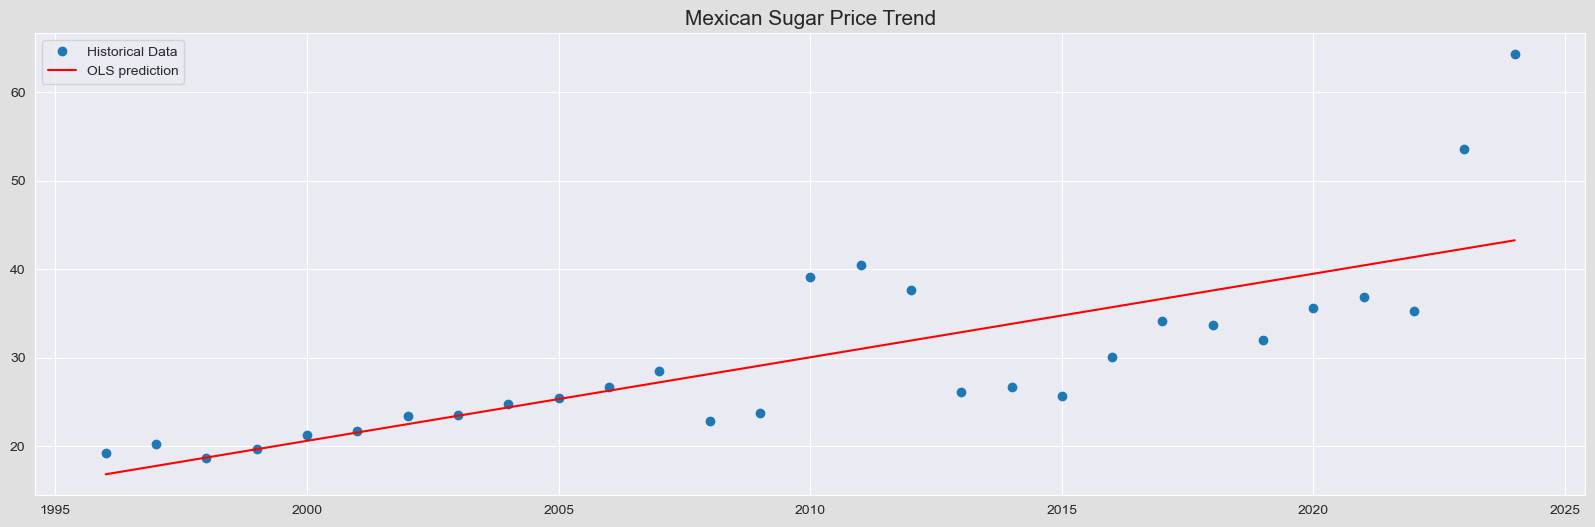

In [8]:
# Plot Predictions vs. Actuals
fig, ax = plt.subplots(figsize=(20,6))
fig.patch.set_facecolor('#E0E0E0')
plt.grid(zorder=0)
ax.plot(mx_df['Year'], mx_df['Price'], "o", label="Historical Data")
ax.plot(mx_df['Year'], price_hat, "r", label="OLS prediction")
ax.legend(loc="best")
plt.title("Mexican Sugar Price Trend",size=15)

Una vez estimada la tendencia del precio, la restamos de la serie de precios para encontrar los **residuos** o **diferenciales**:

In [9]:
# Detrending for Residuals
mx_df['Price Trend'] = price_hat.values
mx_df['Price Residuals'] = mx_df['Price'] - mx_df['Price Trend']
mx_df

,Year,Production,Beginning stocks,Imports,Supply,Disappearance,Exports,Total use,Ending stocks,Stocks-to-human consumption,Stocks-to-use,HFCS consumption (dry weight),Previous Year Precipitation,Previous Year Temperature,Price,Exchange Rate,Price Trend,Price Residuals
0,1996,4642.00000,1587.000000,234.000000,6463.000000,4414.000000,646.000000,5060.000000,1403.000000,32.304858,27.727273,123.374946,766.80,21.173363,19.209814,7.486683,16.835828,2.373987
1,1997,4818.00000,1403.000000,191.000000,6412.000000,4391.000000,966.000000,5357.000000,1055.000000,24.529179,19.693859,425.802000,664.40,20.828869,20.239937,7.858392,17.780575,2.459362
2,1998,5486.00000,1055.000000,31.000000,6572.000000,4505.000000,1076.000000,5581.000000,991.000000,22.568891,17.756674,433.881320,692.10,20.722723,18.721164,8.671900,18.725322,-0.004158
3,1999,4982.00000,991.000000,41.000000,6014.000000,4549.000000,524.000000,5073.000000,941.000000,21.279964,18.549182,508.270000,741.00,21.239854,19.722633,9.695850,19.670069,0.052564
4,2000,4979.00000,941.000000,37.000000,5957.000000,4576.000000,318.000000,4894.000000,1063.000000,23.914511,21.720474,614.800000,754.10,20.749099,21.324582,9.451167,20.614816,0.709766
5,2001,5220.00000,1063.000000,43.000000,6326.000000,4623.000000,155.000000,4778.000000,1548.000000,34.545860,32.398493,636.000000,765.20,20.816391,21.743358,9.406742,21.559563,0.183794
6,2002,5169.00000,1548.000000,52.000000,6769.000000,5184.000000,413.000000,5597.000000,1172.000000,23.421263,20.939789,278.250000,766.10,20.743932,23.468193,9.432075,22.504311,0.963883
7,2003,5229.00000,1172.000000,63.000000,6464.000000,5232.000000,38.000000,5270.000000,1194.000000,23.425544,22.656546,137.800000,738.90,20.936534,23.576392,10.541250,23.449058,0.127335
8,2004,5330.00000,1194.000000,327.000000,6851.000000,5600.000000,14.000000,5614.000000,1237.000000,22.992565,22.034200,143.100000,796.10,20.955060,24.820280,11.257033,24.393805,0.426476
9,2005,6149.00000,1237.000000,268.000000,7654.000000,5561.000000,127.510000,5688.510000,1965.490000,37.232241,34.551930,376.300000,872.20,20.867124,25.499128,11.048642,25.338552,0.160576


<Axes: title={'center': 'Mexico Correlogram'}>

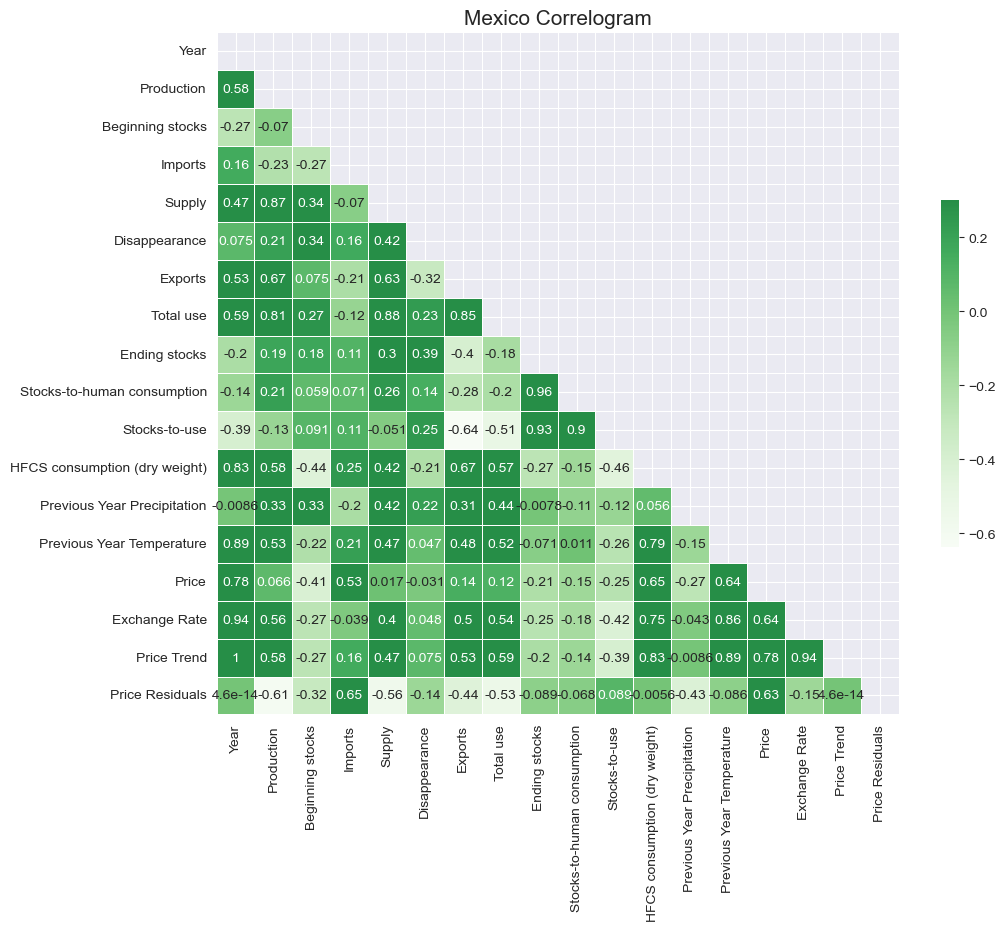

In [10]:
# Compute the correlation matrix
corr = mx_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
plt.title("Mexico Correlogram",size=15)
sns.heatmap(corr, mask=mask, cmap = "Greens", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [11]:
# Compute the correlation matrix
pd.DataFrame(mx_df.corr()['Price Residuals']).sort_values(by=['Price Residuals'])


,Price Residuals
Production,-6.084218e-01
Supply,-5.596905e-01
Total use,-5.321419e-01
Exports,-4.412614e-01
Previous Year Precipitation,-4.257636e-01
Beginning stocks,-3.154421e-01
Exchange Rate,-1.482687e-01
Disappearance,-1.420545e-01
Ending stocks,-8.947814e-02
Previous Year Temperature,-8.637924e-02


Al remover la tendencia podemos observar las correlaciones esperadas:
- Correlación Negativa de Exportaciones con el Precio: A mayor precio local, mayor producción destinada a mercado interno y menor producción destinada a exportación.
- Correlación Positiva de Importaciones con el Precio: A mayor precio local, más importaciones para vender internamente a mejor precio.
- Correlación de la *Producción* con los *Residuales de Precio* es **Inversamente Moderada** con un valor aproximado de **-0.61**

Text(0.5, 1.0, 'Price Residuals vs. Production Mexico')

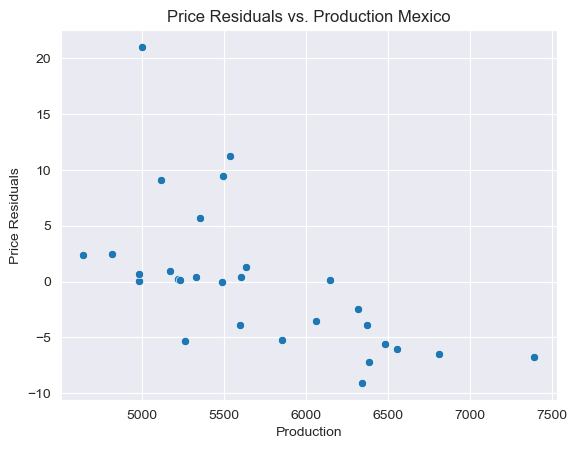

In [12]:
sns.scatterplot(x="Production",
                    y="Price Residuals",
                    data=mx_df).set_title('Price Residuals vs. Production Mexico')